In [34]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
% matplotlib inline

In [8]:
dwpc_df = pd.read_csv('rephetio-DWPCs-hetmech.tsv', sep='\t')

In [10]:
dwpc_df.head()

,compound,disease,CbGaD,CbGdD,CbGuD,CdGaD,CdGdD,CdGuD,CpDrD,CrCpD,...,CuGuDlAlD,CuGuDpCpD,CuGuDpCtD,CuGuDpSpD,CuGuDrDrD,CuGuDtCpD,CuGuDtCtD,CuGuDuGaD,CuGuDuGdD,CuGuDuGuD
0,DB00014,DOID:0050156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.002885,0.0,0.000216,0.000662,0.001791
1,DB00014,DOID:0050425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000230,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000
2,DB00014,DOID:0050741,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001057,0.0,0.0,0.000413,0.0,0.000000,0.0,0.000000,0.000212,0.001160
3,DB00014,DOID:0050742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.008050,0.0,0.000000,0.000816,0.001002
4,DB00014,DOID:0060073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000


In [13]:
dwpc_data = dwpc_df.loc[:, 'CbGaD':]

In [19]:
average_nnz = numpy.mean((dwpc_data != 0).sum(axis=0))

In [20]:
# Average density
average_nnz / dwpc_df.shape[0]

0.19900600184716746

In [29]:
metapath_density_df = (pd.DataFrame((dwpc_data != 0).sum(axis=0) / dwpc_df.shape[0])
                    .reset_index()
                    .rename(columns={'index': 'metapath', 0: 'density'}))

In [32]:
metapath_density_df[metapath_density_df['density'] > 0.3]

,metapath,density
16,CbGaDrD,0.410128
22,CbGdAlD,0.590437
26,CbGeAlD,0.800046
27,CbGiGaD,0.348183
30,CbGr>GaD,0.324568
33,CbGuAlD,0.566498
38,CcSEcCtD,0.386480
39,CdG<rGaD,0.395604
48,CdGdAlD,0.319762
52,CdGeAlD,0.445806


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f34c7af3198>]],
      dtype=object)

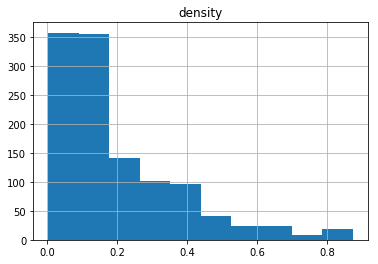

In [35]:
metapath_density_df.hist(column='density')